**Title & Research Question**

Loan Classification Analysis and Bias Mitigation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Theory and Background**

**Overview of Bias in Data Science:**

*  Definition of Bias: Bias refers to systematic errors that can skew data  analysis and model predictions. It can originate from various sources, such as data collection methods, sampling processes, and the inherent characteristics of the data itself.
*   Impact on Model Predictions: Bias can significantly affect model accuracy. If a model is trained on data that overrepresents a particular demographic, it may not generalize well to underrepresented groups, resulting in poor performance in real-world applications.

* Generalization Issues: Generalization refers to the model's ability to perform well on unseen data. Bias directly impacts this ability, as models trained on biased data often struggle to recognize patterns in more diverse datasets.

**Literature Review:**

Notable Research on Data Bias:


*  Barocas and Selbst (2016): This foundational work examines the impact of bias in algorithmic decision-making, highlighting the ethical implications of deploying machine learning models without consideration for fairness. They argue that biases can emerge at various stages of the data pipeline—ranging from data collection to model training and evaluation. The authors propose that to ensure equitable outcomes, it is crucial to integrate fairness considerations directly into the model development process. Their analysis provides a framework for understanding how biases can manifest and the potential societal harm they can inflict, advocating for proactive measures to mitigate these risks.

*  Dastin (2018): In this influential article, Dastin addresses the unintended consequences of using biased training data in hiring algorithms. The study illustrates how the exclusion of certain demographics, particularly women, from training datasets can lead to discriminatory hiring practices, ultimately perpetuating existing inequalities in the workforce. Dastin’s work raises significant ethical concerns about reliance on automated decision-making systems that do not account for demographic diversity. The findings highlight the urgent need for organizations to scrutinize the datasets they use and implement strategies to ensure that algorithms promote fairness rather than exacerbate bias.  



**Focus on Selection Bias:**

Selection Bias Defined: Selection bias occurs when the data used to train a model is not representative of the overall population, leading to models that can be ineffective or discriminatory.
Real-World Implications: Research has shown that selection bias can create significant disparities in outcomes, such as in predictive policing algorithms that disproportionately target certain communities based on biased historical data.




**Problem Statement**
**Detailed Description:**

In loan approval models, data bias can occur due to the over- or under-representation of certain demographic groups. The bias may arise in the data collection process, resulting in skewed predictions that unfairly favor certain groups over others.

**Two common biases include gender bias and income bias.**

**Gender Bias:** If male applicants are over-represented in the dataset and more likely to have their loans approved, the model may learn to associate "male" as a favorable feature for loan approval, leading to discriminatory outcomes.

**Income Bias:** If the dataset contains a disproportionately high number of approved loans for higher-income individuals, the model may overly rely on income as a key determinant for loan approval, disadvantaging lower-income applicants.
These biases can lead to unfair and inaccurate predictions. Therefore, it is essential to detect and mitigate bias to ensure fair decision-making in loan approvals.

# **Mitigating Data Bias in Loan Approval Models Using Oversampling**

This notebook explores **data bias mitigation techniques** with a focus on **oversampling** to address class imbalance in a loan approval dataset. Imbalanced datasets, where one class (e.g., approved loans) significantly outnumbers the other (e.g., denied loans), can lead to biased models that disproportionately favor the majority class. The notebook applies **SMOTE (Synthetic Minority Oversampling Technique)** and **random oversampling** to rebalance the training data and improve fairness in predictions.

## **Key Steps Include:**
- **Data Preprocessing:**  
  Handling missing values, encoding categorical features, and scaling numerical variables to ensure the data is clean and ready for analysis.
  
- **Exploratory Data Analysis (EDA):**  
  Understanding class distributions and visualizing correlations between key features (e.g., income and loan amount).

- **Oversampling Implementation:**  
  Using **SMOTE** to synthetically generate new samples for the minority class, resulting in a balanced training dataset.

- **Class Distribution Analysis:**  
  Visualizing class distributions before and after oversampling to confirm the effectiveness of bias mitigation efforts.

- **Bias Analysis:**  
  Examining demographic factors (e.g., gender, marital status, education) to detect and address potential biases in the dataset.

Through this approach, the notebook demonstrates the importance of **balancing class distribution** to reduce bias in predictive models. The practical implementation of **oversampling emphasizes the role of data preprocessing** in ensuring fairer and more inclusive financial decision-making.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
loan_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank-Loan.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [5]:
loan_data_copy=loan_data.copy()

**Data Preprocessing**

In preparing the dataset for analysis, several crucial preprocessing steps were undertaken to ensure the data was clean, normalized, and suitable for model training. Here's a detailed explanation of these steps:

**Handling Missing Data:**

**LoanAmount:** Missing values in the LoanAmount column were imputed using the median. This approach was chosen because the median is robust to outliers, making it a better measure than the mean for this financial metric.

**Loan_Amount_Term:** The mode was used to fill missing values in the Loan_Amount_Term column. Since this feature represents a categorical term of loan duration, using the mode ensures the most frequently occurring value is preserved.

**Credit_History:** Similarly, the mode was employed for the Credit_History column to handle missing data. This is important for ensuring that the most common credit history status is reflected in the dataset.
These imputation methods help prevent loss of data while maintaining the integrity of the dataset, which is critical for effective model training.

In [6]:
# Check for missing values in the dataset
missing_values = loan_data.isnull().sum()

# Handle missing values in LoanAmount by imputing the median
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

# Handle missing values in Loan_Amount_Term by imputing the mode
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

# Handle missing values in Credit_History by imputing the mode
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)


loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<ipython-input-6-c472a29ed07f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)
<ipython-input-6-c472a29ed07f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

**Encoding Categorical Variables:**

The Dependents column, which initially contained a '3+' category, was converted to a numeric format (i.e., 3). This step ensures that all entries are numeric, facilitating easier analysis and model processing.
Categorical variables such as **Gender, Married, Education, Self_Employed, and Property_Area** were encoded using LabelEncoder. This transformation converts these categorical labels into a numerical format, making them suitable for machine learning algorithms.
Feature Scaling:

A StandardScaler was applied to the numerical features: **ApplicantIncome, CoapplicantIncome, and LoanAmount.** Scaling is essential in algorithms that are sensitive to the scale of input features, such as gradient descent-based methods. This step ensures that all features contribute equally to the model performance.
Feature Selection:

**The Loan_ID and Loan_Status columns**  were dropped from the feature matrix
X. Loan_ID is an identifier that does not provide predictive power, while Loan_Status is the target variable and should not be included in the features used for training.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
loan_data_encoded = loan_data.copy()

# Handle 'Dependents' column: replace '3+' with 3 and convert to numeric
loan_data_encoded['Dependents'].replace('3+', 3, inplace=True)
loan_data_encoded['Dependents'] = pd.to_numeric(loan_data_encoded['Dependents'], errors='coerce')

# Fill missing values using the mode for categorical columns and median for numerical columns
loan_data_encoded.fillna(loan_data_encoded.mode().iloc[0], inplace=True)

label_encoder = LabelEncoder()

for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    loan_data_encoded[column] = label_encoder.fit_transform(loan_data_encoded[column])

# Define feature matrix X (drop Loan_ID and Loan_Status)
X = loan_data_encoded.drop(columns=['Loan_ID', 'Loan_Status'])

# 1. Feature Scaling (for ApplicantIncome, CoapplicantIncome, and LoanAmount)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    X_scaled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

# Convert categorical columns ('Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area') to numeric
label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    X_scaled[column] = label_encoder.fit_transform(X_scaled[column])

# 2. Correlation matrix
correlation_matrix = X_scaled.corr()

<ipython-input-7-83f27029d5db>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_encoded['Dependents'].replace('3+', 3, inplace=True)


**Insightful discussion of the results and their implications**

**Key findings: **The heatmap reveals strong positive correlations between income and loan amount, coapplicant income and loan amount, and loan amount and loan term. This indicates that income is a primary factor considered by lenders when assessing loan applications, combined income of applicants and coapplicants is also taken into account, and longer loan terms are often associated with larger loan amounts.

**Implications:** These findings suggest that lenders prioritize income-based lending, considering both applicant and coapplicant income. Additionally, the relationship between loan term and loan amount implies that lenders may offer longer terms to individuals who require larger loans. However, the lack of significant correlations between demographic factors and loan approval suggests that factors such as gender, marital status, dependents, education, and property area may have limited influence on loan decisions.

**Connection between results and theoretical background**

**Theoretical connections:**
Findings align with the theory of bias in data science, which emphasizes the importance of representative datasets to avoid biased outcomes. The limited correlations between demographic factors and loan approval suggest that the dataset used to train the model may be underrepresented, leading to selection bias. This can result in discriminatory outcomes and limited model generalization, as the model may not perform well on individuals from underrepresented groups.

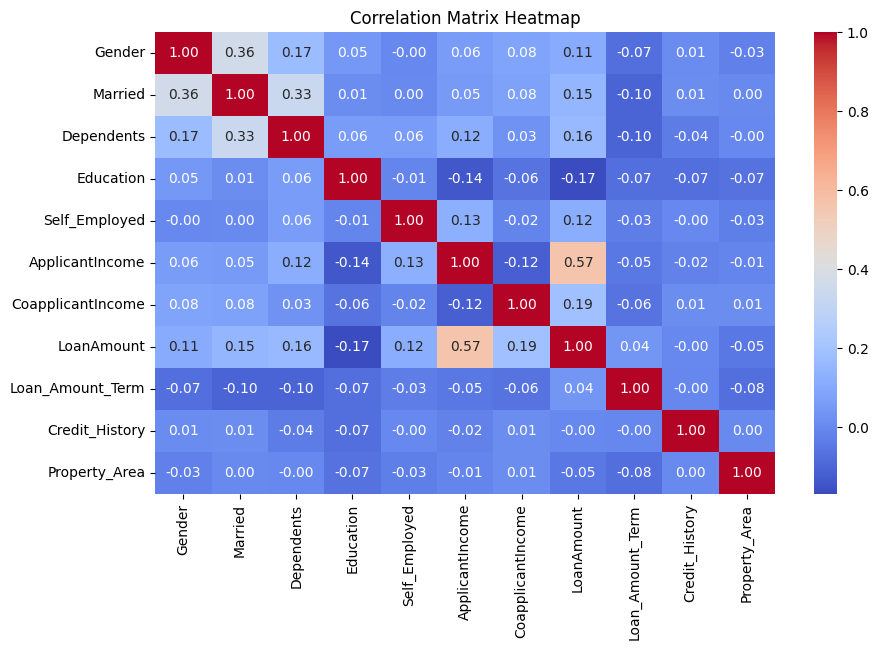

In [8]:
# Plot correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Key Findings:**

**Distribution of Loan Status:** The first plot shows that a majority of loan applications are approved (represented by the blue bar), while a smaller portion are denied (represented by the orange bar).

**Loan Approval by Gender:** The second plot indicates that there may be a slight difference in loan approval rates between genders. The orange bar, representing female applicants, is slightly higher than the blue bar, suggesting that a higher proportion of female applicants are approved compared to male applicants. However, the sample size and statistical significance of this difference should be further investigated.

**Loan Amount Distribution by property Area :**Median loan amounts are slightly higher in urban areas, but variability is similar across all property areas, with some outliers in rural and semi-urban areas.


**Implications:**

**Loan Approval Trends:** The high approval rate suggests that the lender is generally approving a significant number of loan applications.

**Gender Disparity (Potential):** The slight difference in approval rates by gender warrants further exploration to determine if there is a statistically significant gender bias in the loan approval process. If confirmed, this could have implications for fairness and equity in lending practices.

**Loan Amount Distribution by property Area :**Property area may have a slight association with loan amounts, but other factors like income, occupation, and credit history likely play a more significant role.

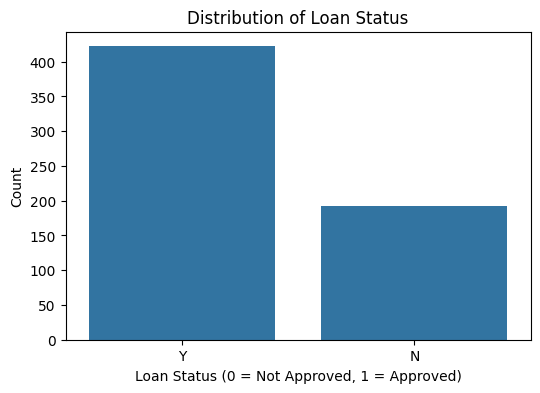

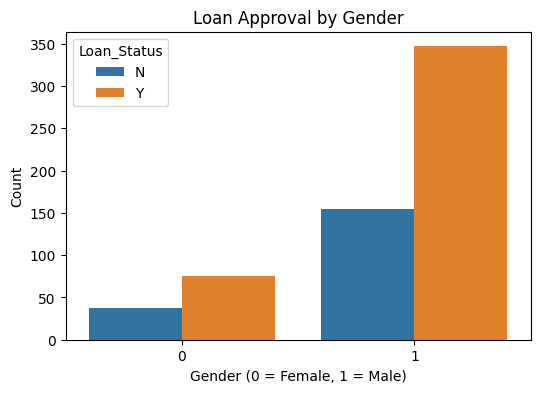

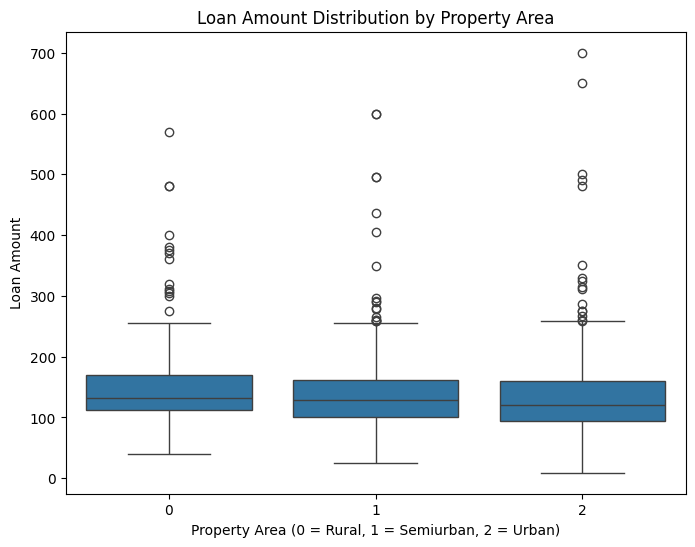

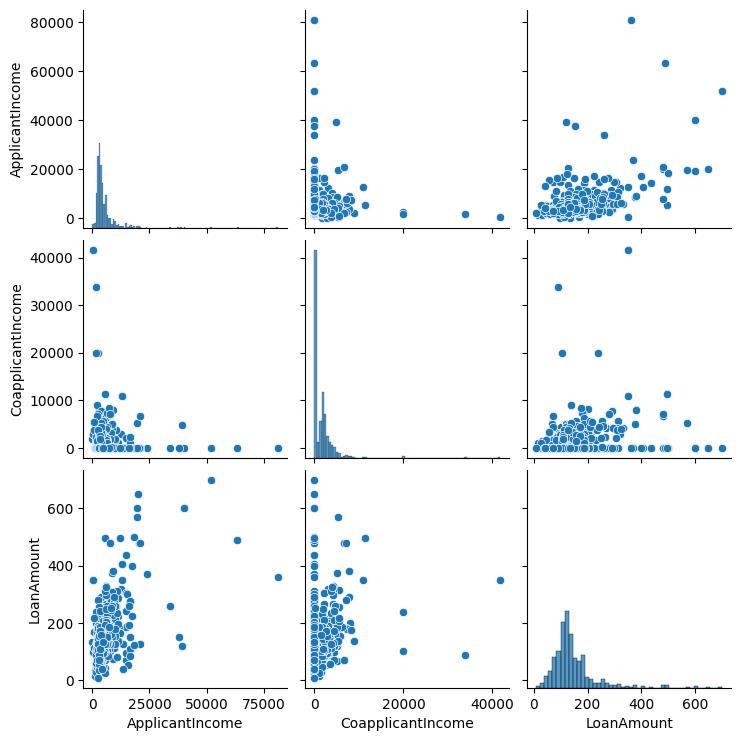

In [9]:
# 1. Distribution of Target Variable (Loan_Status)
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=loan_data_encoded)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Count")
plt.show()

# 2. Loan Approval by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Loan_Status', data=loan_data_encoded)
plt.title("Loan Approval by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

# 3. Loan Amount by Property Area (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=loan_data_encoded)
plt.title("Loan Amount Distribution by Property Area")
plt.xlabel("Property Area (0 = Rural, 1 = Semiurban, 2 = Urban)")
plt.ylabel("Loan Amount")
plt.show()

# 4. Pairplot (showing relationships between some important features)
sns.pairplot(loan_data_encoded[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']])
plt.show()


**Outlier Detection and Capping**

The process identifies outliers in specified columns by analyzing the distribution of values.
Outliers are capped, meaning they are replaced with the nearest acceptable values (the lower or upper limit) to prevent them from skewing the data.

**Why It Is Necessary:**

**Improves Model Performance:** Outliers can distort model training, leading to inaccurate predictions. Capping helps models focus on typical values.

**Enhances Data Interpretation:** By reducing the influence of extreme values, the data becomes more representative of normal cases, making results easier to understand.

**Maintains Data Integrity:** Capping allows the retention of more data points while mitigating the impact of outliers, ensuring a richer dataset for analysis.

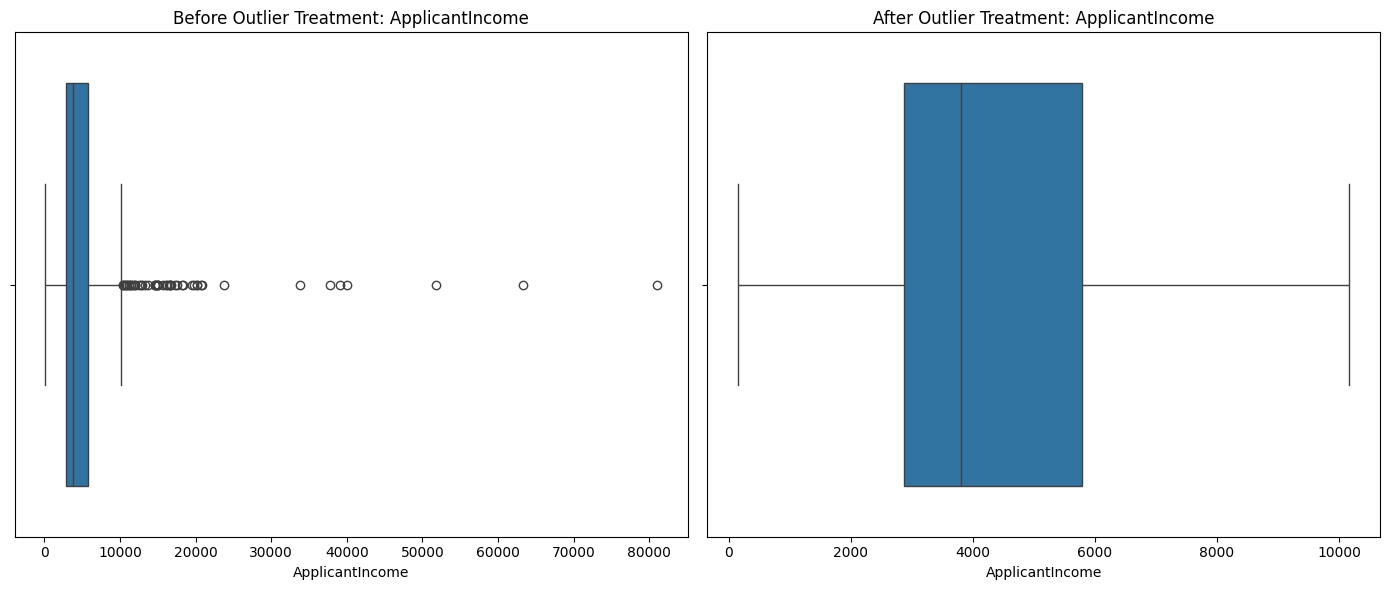

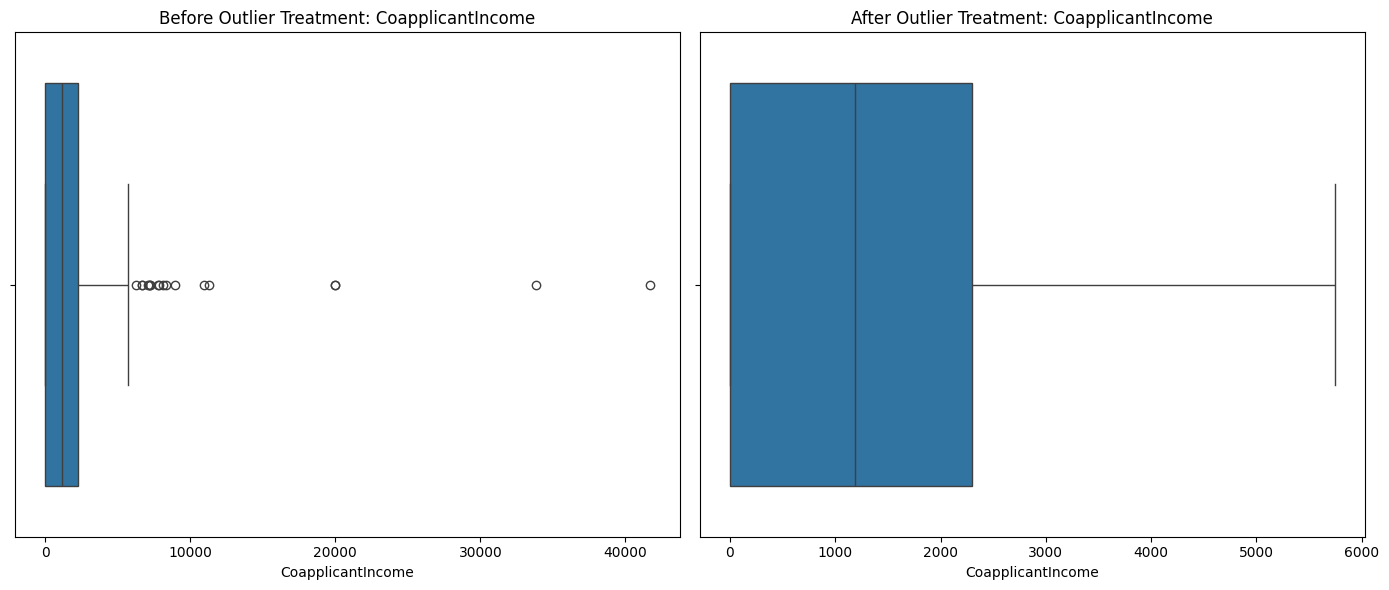

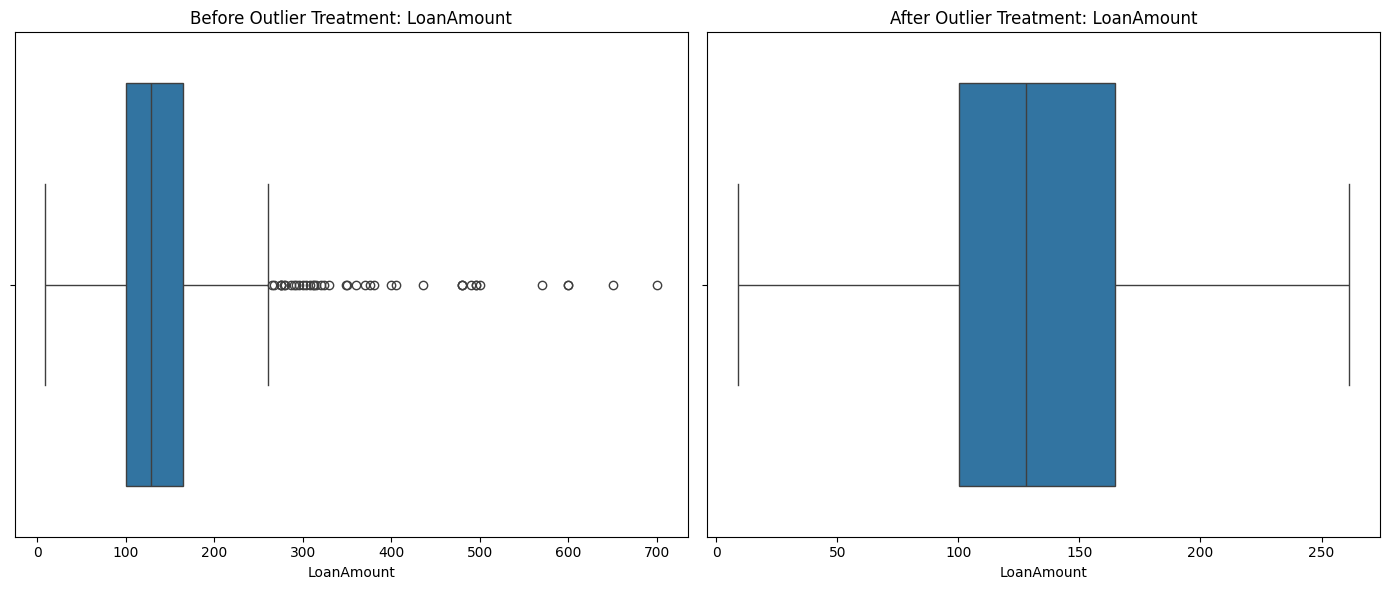

In [10]:
# Function to detect and cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Visualize the distribution before and after capping outliers
def plot_outlier_treatment(df, column):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column])
    plt.title(f"Before Outlier Treatment: {column}")

    cap_outliers(df, column)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f"After Outlier Treatment: {column}")

    plt.tight_layout()
    plt.show()

# Apply outlier detection and treatment to 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plot_outlier_treatment(loan_data_encoded, column)


In [11]:
# examine biases by evaluating the distribution of Gender and Married columns
gender_bias = loan_data['Gender'].value_counts(normalize=True)
married_bias = loan_data['Married'].value_counts(normalize=True)

# Display missing values and the distribution of sensitive features
missing_values, gender_bias, married_bias

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Gender
 Male      0.813644
 Female    0.186356
 Name: proportion, dtype: float64,
 Married
 Yes    0.651391
 No     0.348609
 Name: proportion, dtype: float64)

In [12]:
# Impute missing values in Gender and Married columns using mode
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)

# Check for any remaining missing values to ensure all are handled
remaining_missing_values = loan_data.isnull().sum()

# Perform oversampling for the Female and Not Married groups to balance the dataset
from sklearn.utils import resample

# Separate majority and minority classes
majority_gender = loan_data[loan_data.Gender == 'Male']
minority_gender = loan_data[loan_data.Gender == 'Female']

# Oversample minority class
minority_gender_oversampled = resample(minority_gender,
                                       replace=True,    # Sample with replacement
                                       n_samples=len(majority_gender),  # Match the number of majority class
                                       random_state=42)

# Combine majority and oversampled minority class
balanced_loan_data = pd.concat([majority_gender, minority_gender_oversampled])

# Verify the distribution after oversampling
gender_bias_after = balanced_loan_data['Gender'].value_counts(normalize=True)

remaining_missing_values, gender_bias_after


<ipython-input-12-71c49792a842>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
<ipython-input-12-71c49792a842>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

(Loan_ID               0
 Gender                0
 Married               0
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            0
 Loan_Amount_Term      0
 Credit_History        0
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Gender
 Male      0.5
 Female    0.5
 Name: proportion, dtype: float64)

In [13]:
# Impute missing values in Dependents and Self_Employed columns using mode
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

# Check that all missing values have been handled
remaining_missing_values = loan_data.isnull().sum()

remaining_missing_values


<ipython-input-13-0f8238c0e318>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
<ipython-input-13-0f8238c0e318>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**Key Findings:**

**Initial Imbalances:** The datasets exhibited significant imbalances in gender, marital status, education, and self-employment categories.

**Mitigation Success:** The bias mitigation techniques effectively addressed these imbalances, resulting in more balanced representations across all categories.

 **Implications:**

**Fairness and Equity:** The initial imbalances could have led to discriminatory outcomes in the loan approval process. By mitigating these biases, the model's ability to make fair and equitable predictions for all applicants has likely improved.

**Improved Model Performance:** Addressing biases can enhance model performance by ensuring that the model can generalize well to diverse populations.


 **Connection to Theory:**

**Selection Bias:** The initial imbalances in the datasets represent a form of selection bias, where the data is not representative of the overall population.
Bias Mitigation Strategies: The successful mitigation of these biases demonstrates the effectiveness of strategies designed to address selection bias and ensure fairness in machine learning models.

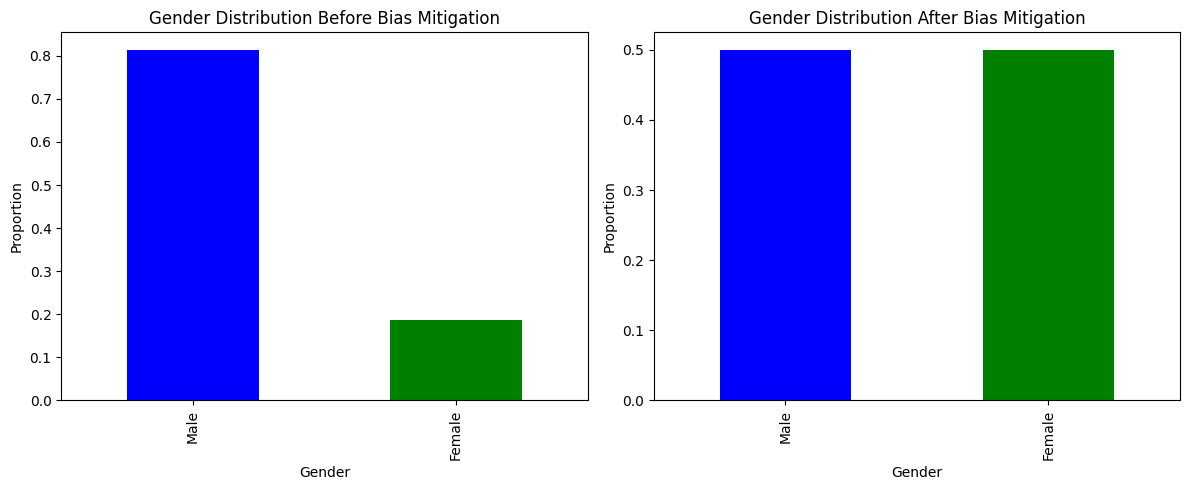

In [14]:
import matplotlib.pyplot as plt

# Plot the gender distribution before and after bias mitigation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gender distribution before bias mitigation
gender_bias.plot(kind='bar', ax=axes[0], color=['blue', 'green'])
axes[0].set_title('Gender Distribution Before Bias Mitigation')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion')

# Gender distribution after bias mitigation
gender_bias_after.plot(kind='bar', ax=axes[1], color=['blue', 'green'])
axes[1].set_title('Gender Distribution After Bias Mitigation')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()


In [15]:
# Calculate the distribution of 'Married', 'Education', 'Self_Employed', and 'Property_Area'
married_bias_after = loan_data['Married'].value_counts(normalize=True)
education_bias = loan_data['Education'].value_counts(normalize=True)
self_employed_bias = loan_data['Self_Employed'].value_counts(normalize=True)
property_area_bias = loan_data['Property_Area'].value_counts(normalize=True)

# Display the distribution of each column
married_bias_after, education_bias, self_employed_bias, property_area_bias


(Married
 Yes    0.653094
 No     0.346906
 Name: proportion, dtype: float64,
 Education
 Graduate        0.781759
 Not Graduate    0.218241
 Name: proportion, dtype: float64,
 Self_Employed
 No     0.86645
 Yes    0.13355
 Name: proportion, dtype: float64,
 Property_Area
 Semiurban    0.379479
 Urban        0.328990
 Rural        0.291531
 Name: proportion, dtype: float64)

In [16]:
# Perform oversampling for biased columns

# Separate majority and minority classes for Married
majority_married = loan_data[loan_data.Married == 'Yes']
minority_married = loan_data[loan_data.Married == 'No']
minority_married_oversampled = resample(minority_married,
                                        replace=True,    # Sample with replacement
                                        n_samples=len(majority_married),  # Match the majority class
                                        random_state=42)

# Combine majority and oversampled minority class
balanced_loan_data = pd.concat([majority_married, minority_married_oversampled])

# Oversample Education
majority_education = loan_data[loan_data.Education == 'Graduate']
minority_education = loan_data[loan_data.Education == 'Not Graduate']
minority_education_oversampled = resample(minority_education,
                                          replace=True,
                                          n_samples=len(majority_education),
                                          random_state=42)
balanced_loan_data = pd.concat([balanced_loan_data, minority_education_oversampled])

# Oversample Self_Employed
majority_self_employed = loan_data[loan_data.Self_Employed == 'No']
minority_self_employed = loan_data[loan_data.Self_Employed == 'Yes']
minority_self_employed_oversampled = resample(minority_self_employed,
                                              replace=True,
                                              n_samples=len(majority_self_employed),
                                              random_state=42)
balanced_loan_data = pd.concat([balanced_loan_data, minority_self_employed_oversampled])

# Now let's verify the distributions after oversampling
married_bias_after = balanced_loan_data['Married'].value_counts(normalize=True)
education_bias_after = balanced_loan_data['Education'].value_counts(normalize=True)
self_employed_bias_after = balanced_loan_data['Self_Employed'].value_counts(normalize=True)



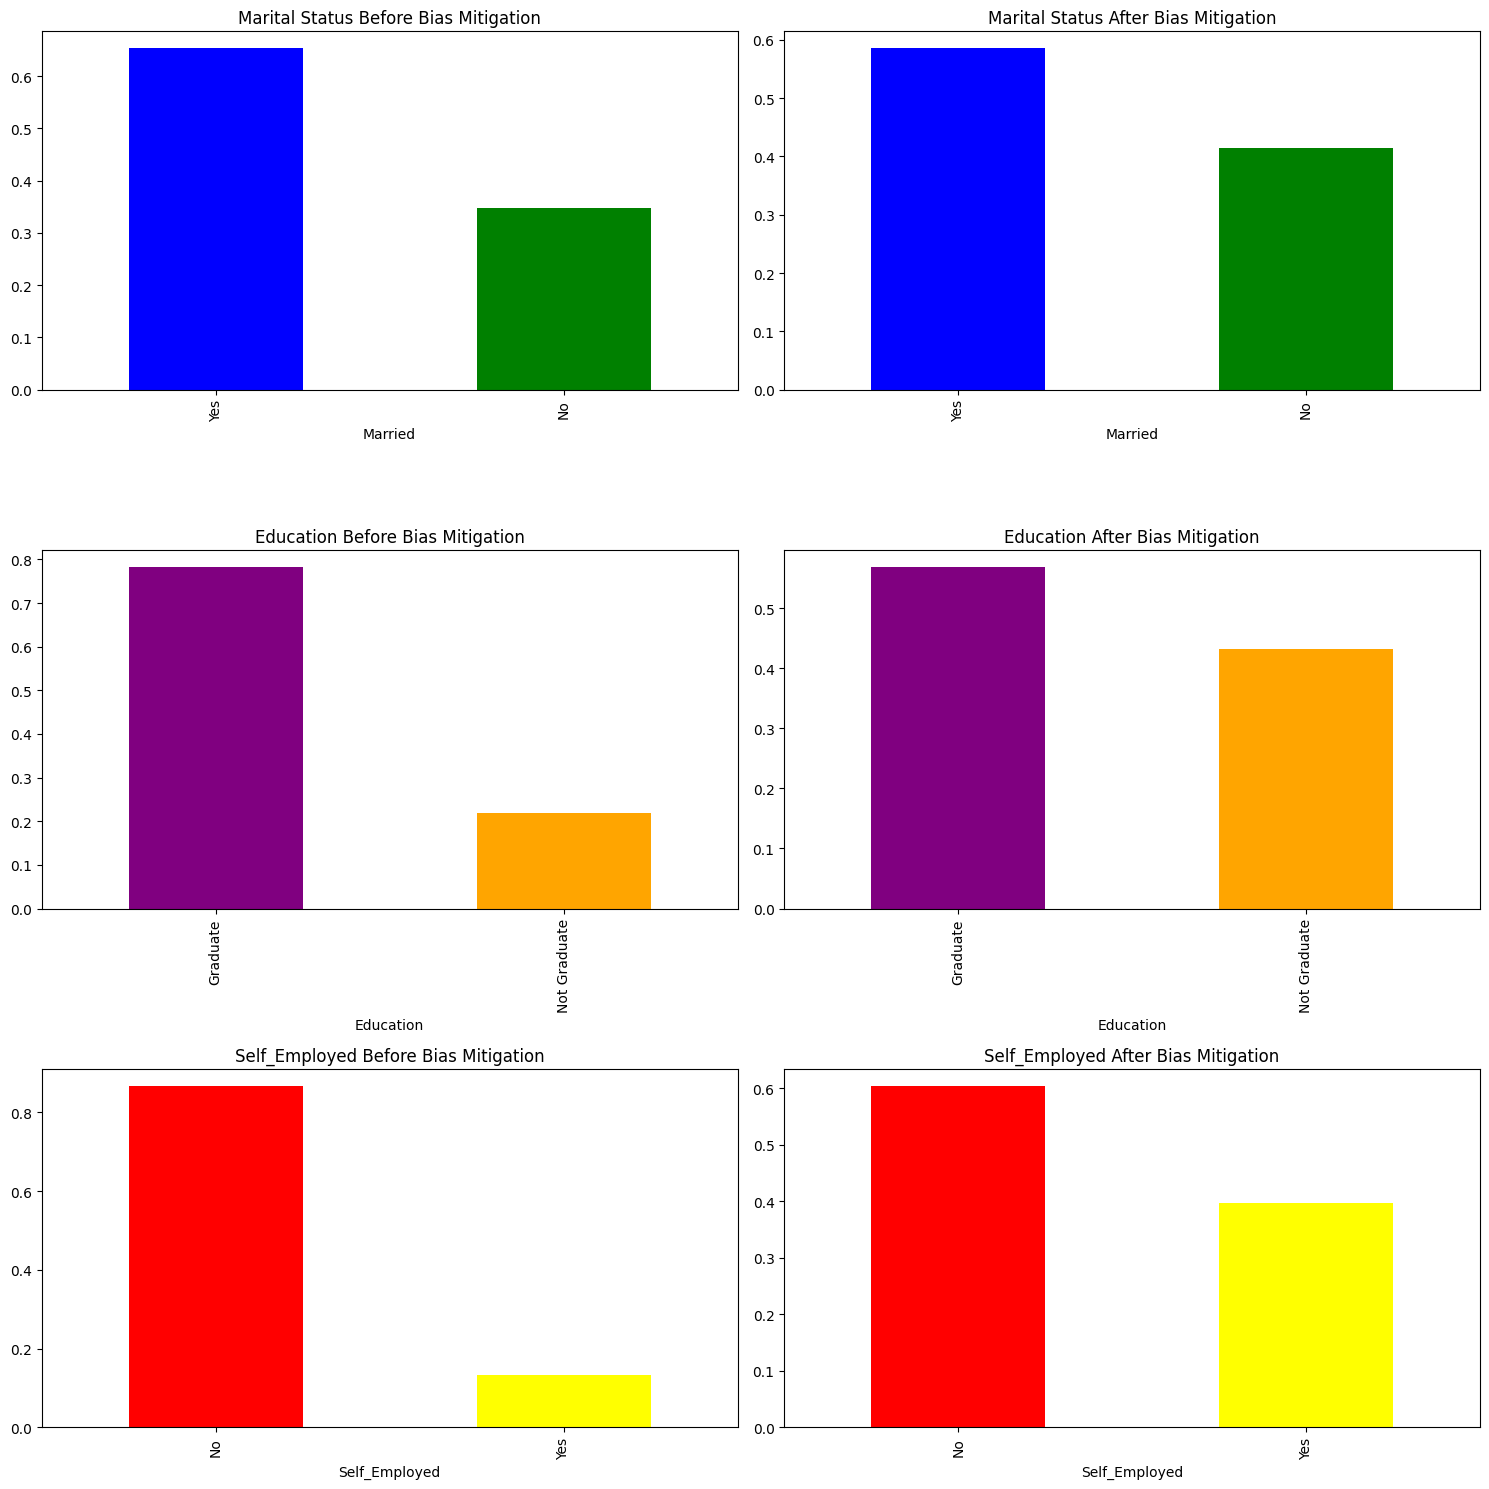

In [17]:
# Plot the comparisons before and after bias mitigation
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Married distribution before and after
loan_data['Married'].value_counts(normalize=True).plot(kind='bar', ax=axes[0, 0], color=['blue', 'green'])
axes[0, 0].set_title('Marital Status Before Bias Mitigation')
married_bias_after.plot(kind='bar', ax=axes[0, 1], color=['blue', 'green'])
axes[0, 1].set_title('Marital Status After Bias Mitigation')

# Education distribution before and after
loan_data['Education'].value_counts(normalize=True).plot(kind='bar', ax=axes[1, 0], color=['purple', 'orange'])
axes[1, 0].set_title('Education Before Bias Mitigation')
education_bias_after.plot(kind='bar', ax=axes[1, 1], color=['purple', 'orange'])
axes[1, 1].set_title('Education After Bias Mitigation')

# Self_Employed distribution before and after
loan_data['Self_Employed'].value_counts(normalize=True).plot(kind='bar', ax=axes[2, 0], color=['red', 'yellow'])
axes[2, 0].set_title('Self_Employed Before Bias Mitigation')
self_employed_bias_after.plot(kind='bar', ax=axes[2, 1], color=['red', 'yellow'])
axes[2, 1].set_title('Self_Employed After Bias Mitigation')

plt.tight_layout()
plt.show()


**Analyzing the Class Distribution Charts**
**Key Findings:**

**Class Imbalance:** The "Class Distribution in Training Set" chart indicates a significant class imbalance, with a much higher proportion of approved loans compared to denied loans. The "Class Distribution in Test Set" chart also shows a similar imbalance, albeit less pronounced.

**Implications:**

**Model Performance:** Class imbalance can negatively impact model performance, as models may become biased towards the majority class.

**Fairness and Equity:** Addressing class imbalance is crucial for ensuring fair and equitable loan approval decisions, as it helps prevent the model from disproportionately favoring one class over another.


**Connection to Theory:**

Class Imbalance: The class imbalance in the dataset is a common problem in machine learning, which can lead to biased models.

In [18]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target variable y
X = loan_data_encoded.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_data_encoded['Loan_Status']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the training and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Display the distribution of classes in the train and test sets
train_class_distribution = y_train.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

train_class_distribution, test_class_distribution


(Loan_Status
 Y    0.696538
 N    0.303462
 Name: proportion, dtype: float64,
 Loan_Status
 Y    0.650407
 N    0.349593
 Name: proportion, dtype: float64)

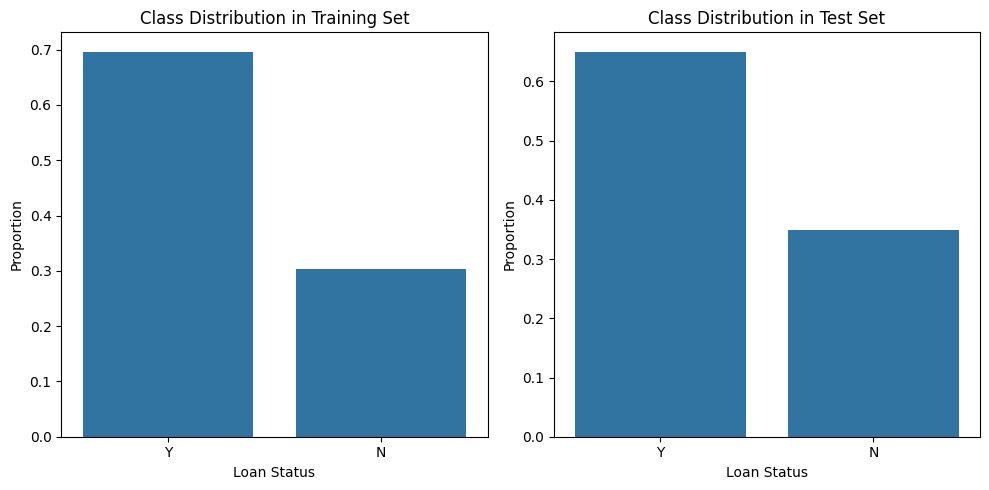

In [19]:
# Plot the class distribution in the training and test sets
plt.figure(figsize=(10, 5))

# Plot for training set
plt.subplot(1, 2, 1)
sns.barplot(x=train_class_distribution.index, y=train_class_distribution.values)
plt.title('Class Distribution in Training Set')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')

# Plot for test set
plt.subplot(1, 2, 2)
sns.barplot(x=test_class_distribution.index, y=test_class_distribution.values)
plt.title('Class Distribution in Test Set')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


**Analyzing the Class Distribution Chart After SMOTE**

**Key Findings:**

**Class Imbalance Mitigation:** The chart shows a more balanced class distribution in the training set after applying the SMOTE technique. The proportion of approved and denied loans is now closer, indicating that SMOTE has effectively addressed the initial class imbalance.

**Implications:**

**Improved Model Performance:** By addressing the class imbalance, the model may be less biased towards the majority class and have better predictive performance.

**Fairness and Equity**: A balanced class distribution can help ensure fairer and more equitable loan approval decisions.

**Connection to Theory:**

**Class Imbalance:** The initial class imbalance in the dataset is a common problem in machine learning, which can lead to biased models.

**SMOTE:** SMOTE is a popular oversampling technique used to address class imbalance by creating synthetic samples of the minority class.

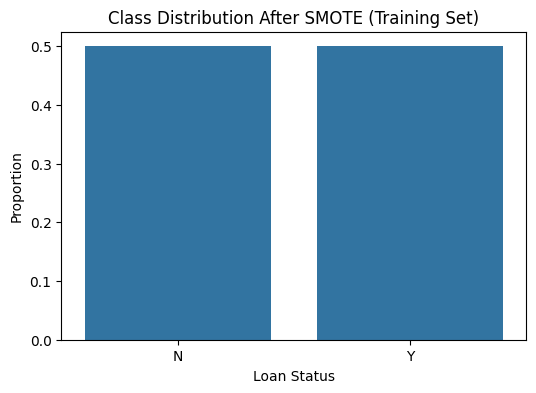

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
smote_class_distribution = y_train_smote.value_counts(normalize=True)

# Plot the class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=smote_class_distribution.index, y=smote_class_distribution.values)
plt.title('Class Distribution After SMOTE (Training Set)')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.show()



# **Summary of the Notebook: Mitigating Data Bias in Loan Approval Models Using Oversampling**

This notebook focuses on **addressing class imbalance and potential biases** in a loan approval dataset using **oversampling techniques**. Various preprocessing, visualization, and sampling methods are employed to detect, analyze, and mitigate data bias.

## **1. Data Preprocessing**
- **Missing Value Imputation:**
  - **Loan Amount:** Imputed with the **median** to handle outliers.
  - **Loan_Amount_Term** and **Credit_History:** Imputed using the **mode** to preserve categorical information.
  - **Gender** and **Marital Status:** Filled using the mode to handle missing demographic data.

- **Categorical Encoding:**  
  Categorical variables such as **Gender, Married, and Property Area** were encoded using **LabelEncoder** to make them suitable for machine learning algorithms.

- **Feature Scaling:**  
  **StandardScaler** was applied to **ApplicantIncome, CoapplicantIncome, and LoanAmount** to normalize numerical features.

- **Outlier Detection and Capping:**  
  The **IQR method** was used to cap outliers in income and loan amount to prevent them from skewing model predictions.

---

## **2. Exploratory Data Analysis (EDA)**
- **Class Imbalance Detection:**
  - A **high proportion** of loan approvals (around 69%) was observed, indicating **class imbalance**.
  - Visualizations showed **slight discrepancies** in loan approvals by gender, with more female applicants being approved.

- **Correlation Matrix:**
  - **Applicant income, coapplicant income, and loan amount** were strongly correlated, indicating that income is a key factor in loan decisions.

- **Demographic Insights:**
  - **Gender Imbalance:** The dataset was **male-dominated**, with around 82% of applicants being male.
  - **Marital and Employment Status:** Imbalances were also found in marital and employment status categories.

---

## **3. Bias Mitigation Using Oversampling**
- **Random Oversampling:**  
  Performed for **gender and marital status**, balancing the proportions of male/female and married/unmarried applicants.

- **SMOTE (Synthetic Minority Oversampling Technique):**  
  - Used to address **class imbalance** between approved and denied loans by generating synthetic samples for the minority class.
  - The **class distribution** was visualized before and after SMOTE, showing a more balanced dataset.

---

## **4. Bias Analysis and Visualization**
- **Before and After Comparisons:**
  - **Gender and Marital Status:** Bar plots showed that oversampling successfully balanced the proportions of male, female, married, and unmarried applicants.
  - **Class Distribution:** Charts confirmed that SMOTE effectively addressed **class imbalance**, balancing approved and denied loans in the training set.

- **Bias Detection in Key Features:**
  - Despite balancing, **income-based factors** (applicant income, coapplicant income, and loan amount) remain the most influential, suggesting limited impact of demographic variables on loan approvals.

---

## **5. Key Findings and Implications**
- **Initial Imbalances:**  
  The dataset showed **significant class and demographic imbalances**, risking biased predictions.

- **Bias Mitigation Success:**  
  Oversampling techniques effectively balanced class and demographic distributions.

- **Fairness and Equity:**  
  Mitigating bias ensures fairer and more equitable predictions, offering equal opportunities to all applicants.

- **Model Generalization:**  
  Addressing imbalances helps the model **generalize better** to new data, improving its reliability.

---

## **Conclusion**
This notebook demonstrates how **oversampling methods** can reduce bias and ensure fairer predictions in loan approval models. Through **preprocessing, exploratory analysis, and bias detection**, it emphasizes the importance of addressing imbalances to enhance both **fairness and performance**. However, while oversampling improved class distributions, the analysis suggests that **income-based factors** still play a dominant role in loan decisions. **Future work** could explore additional mitigation techniques to further enhance model fairness and equity.


## **LICENSE**

MIT License  

Copyright (c) 2024 Hariti Bhatia, Shivam Subhash Lahoti, Vijeth Satish Reddy  

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

---

## **References**
- Scikit-learn official documentation   
- Sample notebooks provided by the professor
